In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from sklearn.compose import ColumnTransformer

from scipy import stats
import numpy as np

In [71]:
# Cargar el csv
file_path = 'cars.csv'
df = pd.read_csv(file_path, sep=';')
df.head()

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,REV_Garantia,Averia_grave,QUEJA_CAC,EDAD_COCHE,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad Cliente,Tiempo
0,CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,...,NO DATA,Averia muy grave,SI,2.08,2892,0,0,2,18,0
1,CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,...,SI,No,NO,2.45,1376,7187,0,2,53,0
2,CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,...,NO DATA,No,NO,2.51,1376,0,1,4,21,3
3,CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,...,SI,Averia muy grave,SI,2.43,2015,7256,1,4,48,5
4,CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,...,NO DATA,No,NO,2.30,1818,0,1,3,21,3


# Limpieza

In [72]:
# Identificar valores faltantes
missing_values = df.isnull().sum()
missing_values


CODE                   0
PRODUCTO               0
TIPO_CARROCERIA        0
COMBUSTIBLE            0
Potencia_              0
TRANS                  0
FORMA_PAGO             0
ESTADO_CIVIL         890
GENERO               860
OcupaciOn              0
PROVINCIA              0
Campanna1              0
Campanna2              0
Campanna3              0
Zona _Renta        13178
REV_Garantia           0
Averia_grave           1
QUEJA_CAC              0
EDAD_COCHE             0
COSTE_VENTA            0
km_anno                0
Mas_1_coche            0
Revisiones             0
Edad Cliente           0
Tiempo                 0
dtype: int64

In [73]:
# Porcentaje de valores faltantes
missing_percentage = df.isnull().mean() * 100
missing_percentage

CODE                0.000000
PRODUCTO            0.000000
TIPO_CARROCERIA     0.000000
COMBUSTIBLE         0.000000
Potencia_           0.000000
TRANS               0.000000
FORMA_PAGO          0.000000
ESTADO_CIVIL        1.533187
GENERO              1.481507
OcupaciOn           0.000000
PROVINCIA           0.000000
Campanna1           0.000000
Campanna2           0.000000
Campanna3           0.000000
Zona _Renta        22.701511
REV_Garantia        0.000000
Averia_grave        0.001723
QUEJA_CAC           0.000000
EDAD_COCHE          0.000000
COSTE_VENTA         0.000000
km_anno             0.000000
Mas_1_coche         0.000000
Revisiones          0.000000
Edad Cliente        0.000000
Tiempo              0.000000
dtype: float64

In [74]:
# Eliminar filas con valores faltantes
df.dropna(inplace=True)

In [75]:
# Identificar valores faltantes
missing_percentage = df.isnull().mean() * 100
missing_percentage


CODE               0.0
PRODUCTO           0.0
TIPO_CARROCERIA    0.0
COMBUSTIBLE        0.0
Potencia_          0.0
TRANS              0.0
FORMA_PAGO         0.0
ESTADO_CIVIL       0.0
GENERO             0.0
OcupaciOn          0.0
PROVINCIA          0.0
Campanna1          0.0
Campanna2          0.0
Campanna3          0.0
Zona _Renta        0.0
REV_Garantia       0.0
Averia_grave       0.0
QUEJA_CAC          0.0
EDAD_COCHE         0.0
COSTE_VENTA        0.0
km_anno            0.0
Mas_1_coche        0.0
Revisiones         0.0
Edad Cliente       0.0
Tiempo             0.0
dtype: float64

In [76]:
# Eliminar filas donde el valor de "Zona _Renta" es igual a 'Otros
df = df.drop(df[df['Zona _Renta'] == 'Otros'].index)

In [77]:
# Eliminar filas donde el valor de "Zona _Renta" es igual a 'Otros
df = df.drop(df[df['ESTADO_CIVIL'] == 'OTROS'].index)

In [78]:
#df['Zona _Renta'].fillna(df['Zona _Renta'].mode()[0], inplace=True)

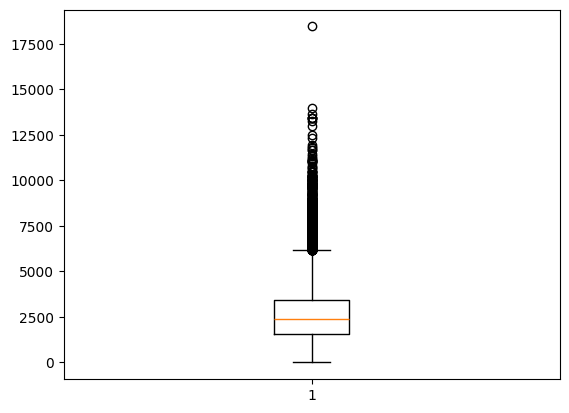

In [79]:
# Diagrama de caja para identificar outliers
plt.boxplot(df['COSTE_VENTA'])
plt.show()

In [80]:
# Usar Z-score para detectar outliers
z_scores = np.abs(stats.zscore(df['COSTE_VENTA']))
outliers = df[z_scores > 3]  # Los valores con Z-score mayor que 3 son considerados outliers
outliers.head()

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,REV_Garantia,Averia_grave,QUEJA_CAC,EDAD_COCHE,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad Cliente,Tiempo
3897,CLI3898,B,TIPO6,FUEL 1,Media,M,Contado,CASADO,M,Empresa,...,NO DATA,Averia muy grave,SI,9.37,8338,13141,0,9,48,0
3919,CLI3920,B,TIPO6,FUEL 1,Media,M,Contado,SOLTERO,M,Empresa,...,SI,Averia muy grave,SI,9.26,7507,14523,0,9,49,0
4019,CLI4020,B,TIPO6,FUEL 2,Media,M,Contado,CASADO,M,Autonomo,...,NO DATA,Averia muy grave,SI,9.35,7645,19931,0,4,50,0
4037,CLI4038,B,TIPO6,FUEL 2,Media,M,Contado,CASADO,M,Empresa,...,SI,Averia muy grave,SI,8.51,8843,31628,1,9,51,6
4116,CLI4117,B,TIPO6,FUEL 2,Media,M,Contado,CASADO,F,Empresa,...,NO DATA,Averia muy grave,SI,8.56,10035,7470,0,4,50,0


In [81]:
df['COSTE_VENTA'].size

42251

In [82]:
# Eliminar outliers
df = df[(z_scores <= 3)]

In [83]:
df['COSTE_VENTA'].size

41773

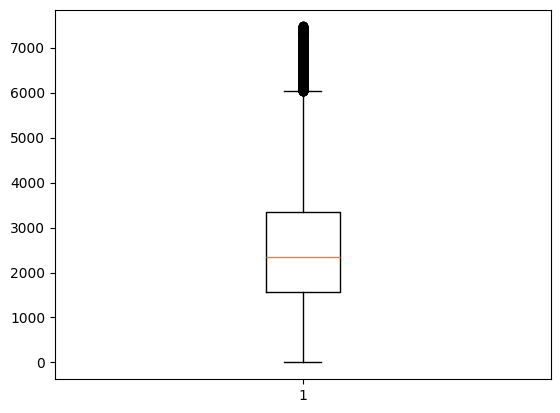

In [84]:
# Diagrama de caja para identificar outliers
plt.boxplot(df['COSTE_VENTA'])
plt.show()

# Codificación de variables categóricas

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41773 entries, 0 to 58047
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CODE             41773 non-null  object 
 1   PRODUCTO         41773 non-null  object 
 2   TIPO_CARROCERIA  41773 non-null  object 
 3   COMBUSTIBLE      41773 non-null  object 
 4   Potencia_        41773 non-null  object 
 5   TRANS            41773 non-null  object 
 6   FORMA_PAGO       41773 non-null  object 
 7   ESTADO_CIVIL     41773 non-null  object 
 8   GENERO           41773 non-null  object 
 9   OcupaciOn        41773 non-null  object 
 10  PROVINCIA        41773 non-null  object 
 11  Campanna1        41773 non-null  object 
 12  Campanna2        41773 non-null  object 
 13  Campanna3        41773 non-null  object 
 14  Zona _Renta      41773 non-null  object 
 15  REV_Garantia     41773 non-null  object 
 16  Averia_grave     41773 non-null  object 
 17  QUEJA_CAC        

In [99]:
# Crear el codificador OneHotEncoder
columnas_seleccionadas = ['COMBUSTIBLE', 'ESTADO_CIVIL', 'GENERO','TRANS' ,'Campanna1', 'Campanna2', 
    'Campanna3']
encoder = OneHotEncoder(sparse_output=False)

In [100]:
# Aplicar el codificador
encoded_array = encoder.fit_transform(df[columnas_seleccionadas])

In [101]:
# Convertir a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(columnas_seleccionadas))

In [102]:
# Aplicar el codificador
encoded_array = encoder.fit_transform(df[columnas_seleccionadas])

In [103]:
# Concatenar con el DataFrame original
df = pd.concat([df.drop(columnas_seleccionadas, axis=1), encoded_df], axis=1)

In [104]:
# Seleccionar las columnas categóricas
categorical_columns = [
    'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia_', 'TRANS', 'FORMA_PAGO',
    'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 'PROVINCIA', 'Campanna1', 'Campanna2', 
    'Campanna3', 'Zona _Renta', 'REV_Garantia', 'Averia_grave', 'QUEJA_CAC'
]

In [105]:
productos = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
productos

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']

In [106]:
tipo_carrocerias = ['TIPO1', 'TIPO2', 'TIPO3', 'TIPO4', 'TIPO5', 'TIPO6', 'TIPO7', 'TIPO8']
tipo_carrocerias

['TIPO1', 'TIPO2', 'TIPO3', 'TIPO4', 'TIPO5', 'TIPO6', 'TIPO7', 'TIPO8']

In [91]:
potencias = df['Potencia_'].unique().tolist()
potencias

['Baja', 'Media', 'Alta']

In [92]:
campanna1 = df['Campanna1'].unique().tolist()
campanna1

['SI', 'NO']

In [94]:
genero = df['GENERO'].unique().tolist()
genero

['M', 'F']

In [109]:
zona_rentas = df['Zona _Renta'].unique().tolist()
zona_rentas

['Medio-Bajo', 'Medio', 'Alto', nan]

- **OneHotEncoder:** 
  - combustibles = ['FUEL 1', 'FUEL 2']
  - estado_civil = ['CASADO', 'SOLTERO', 'OTROS', 'EN PAREJA', nan]
  - genero = ['M', 'F', nan]
  - trans = ['M', 'A']

- **OrdinalEncoder:**
  - tipo_carrocerias = ['TIPO1', 'TIPO2', 'TIPO3', 'TIPO4', 'TIPO5', 'TIPO6', 'TIPO7', 'TIPO8']
  - productos = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
  - potencias = ['Baja', 'Media', 'Alta']
  - zona_rentas = ['Medio-Bajo', 'Medio', 'Alto', nan, 'Otros']


# OneHotEncoder

In [111]:
df.columns

Index(['CODE', 'PRODUCTO', 'TIPO_CARROCERIA', 'Potencia_', 'FORMA_PAGO',
       'OcupaciOn', 'PROVINCIA', 'Zona _Renta', 'REV_Garantia', 'Averia_grave',
       'QUEJA_CAC', 'EDAD_COCHE', 'COSTE_VENTA', 'km_anno', 'Mas_1_coche',
       'Revisiones', 'Edad Cliente', 'Tiempo', 'COMBUSTIBLE_FUEL 1',
       'COMBUSTIBLE_FUEL 2', 'ESTADO_CIVIL_CASADO', 'ESTADO_CIVIL_EN PAREJA',
       'ESTADO_CIVIL_SOLTERO', 'GENERO_F', 'GENERO_M', 'TRANS_A', 'TRANS_M',
       'Campanna1_NO', 'Campanna1_SI', 'Campanna2_NO', 'Campanna2_SI',
       'Campanna3_NO', 'Campanna3_SI'],
      dtype='object')

In [110]:
# Definir las columnas a las que queremos aplicar OneHotEncoder
columnas_seleccionadas

# Crear el codificador OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None)  # sparse_output=False para obtener un DataFrame

# Aplicar el codificador a las columnas seleccionadas
encoded_array = encoder.fit_transform(df[columnas_seleccionadas])

# Convertir el resultado a DataFrame con nombres personalizados de columnas
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(columnas_seleccionadas))

# Concatenar el DataFrame original con las nuevas columnas codificadas
df_final = pd.concat([df.drop(columnas_seleccionadas, axis=1), encoded_df], axis=1)

# Mostrar el resultado final
df_final.head()

KeyError: "None of [Index(['COMBUSTIBLE', 'ESTADO_CIVIL', 'GENERO', 'TRANS', 'Campanna1',\n       'Campanna2', 'Campanna3'],\n      dtype='object')] are in the [columns]"

In [98]:
from sklearn.preprocessing import OrdinalEncoder

# Columnas categóricas a codificar
ordinal_columns = ['TIPO', 'Potencia']

# Crear el codificador OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['TIPO1', 'TIPO2', 'TIPO3', 'TIPO4', 'TIPO5', 'TIPO6', 'TIPO7', 'TIPO8'], 
                                             ['Baja', 'Media', 'Alta']])

# Aplicar el codificador
df[ordinal_columns] = ordinal_encoder.fit_transform(df[ordinal_columns])


KeyError: "None of [Index(['TIPO', 'Potencia'], dtype='object')] are in the [columns]"

In [97]:
# Columnas categóricas a codificar
ordinal_columns = ['TIPO_CARROCERIA', 'Potencia_', 'Zona _Renta', 'PRODUCTO']

# Crear el codificador OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[tipo_carrocerias,productos,potencias,zona_rentas])

# Aplicar el codificador
df[ordinal_columns] = ordinal_encoder.fit_transform(df[ordinal_columns])


ValueError: Found unknown categories ['Media', 'Alta', 'Baja'] in column 1 during fit

In [38]:
#  Mostrar el resultado
# import ace_tools as tools; tools.display_dataframe_to_user(name="Datos Codificados", dataframe=df_encoded)

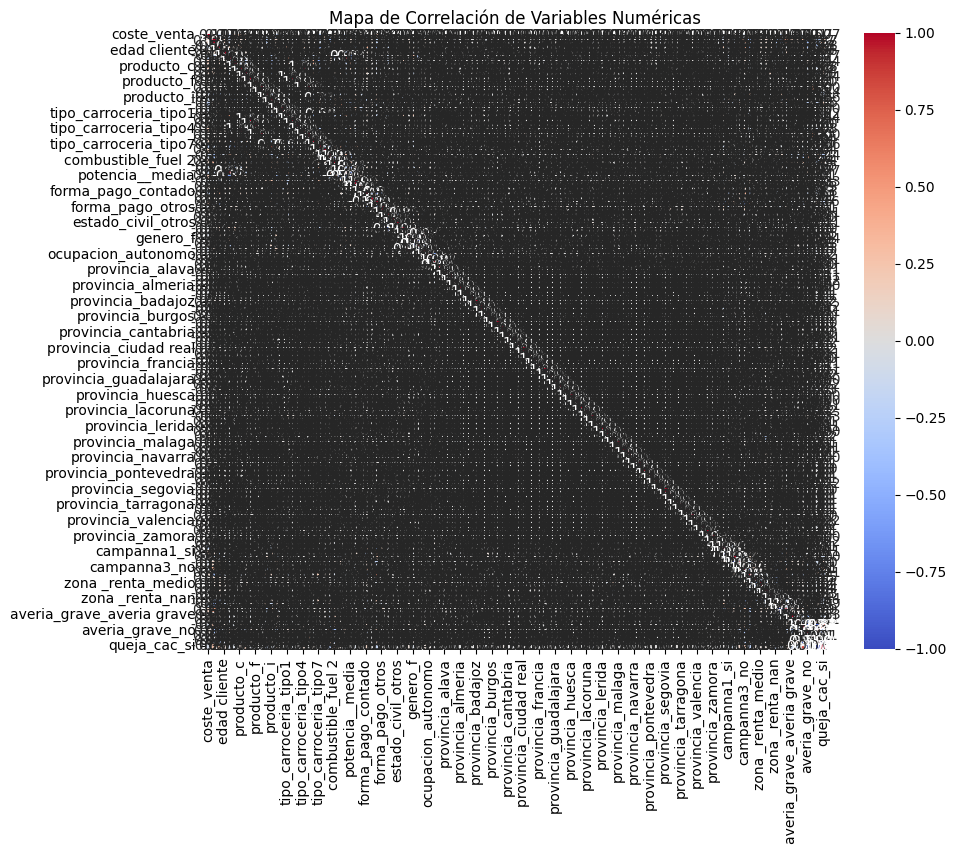

In [36]:
# Convertir nombres de columnas a minúsculas y eliminar espacios (opcional pero recomendable)
df_encoded.columns = df_encoded.columns.str.strip().str.lower()

# Seleccionar solo las columnas numéricas para calcular la correlación
numeric_columns = df_encoded.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Visualizar el mapa de correlación usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Correlación de Variables Numéricas')
plt.show()
